In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.auto import tqdm
import os
import imageio.v2 as imageio
import pandas as pd
import numpy as np

from prepare_data import get_test_dataset, get_datasets, preprocess_testdata
from train_model import get_trained, train, dice_loss
from predict import display, predict_on_samples, predict_full_images, encode_for_submission, get_true_accuracy

In [2]:
history, unet = get_trained()

In [3]:
#### uncomment if you want to train

# history, unet = train()
# history = history.history

In [4]:
test_dataset = get_test_dataset()
train_dataset, valid_dataset = get_datasets(full_image=False)
train_full_dataset, valid_full_dataset = get_datasets(full_image=True)

# Visualize results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


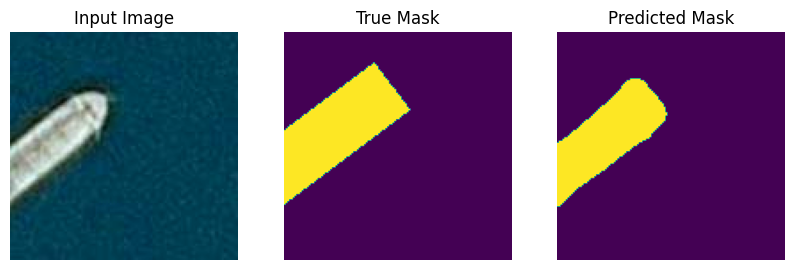

In [5]:
tuples = predict_on_samples(train_dataset, full_image=False, num=1)

for tup in tuples:
    display(tup)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step


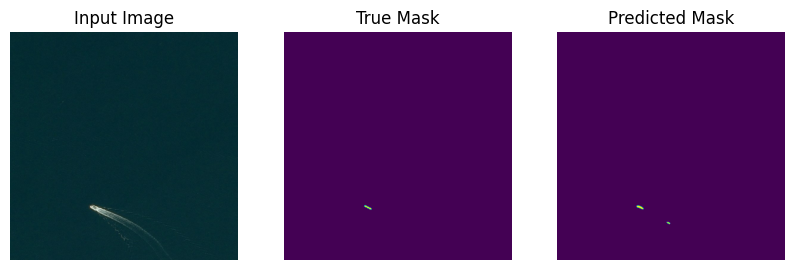

In [6]:
train_preds = predict_on_samples(train_full_dataset, full_image=True, num=1)

for pred in train_preds:
    display(pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


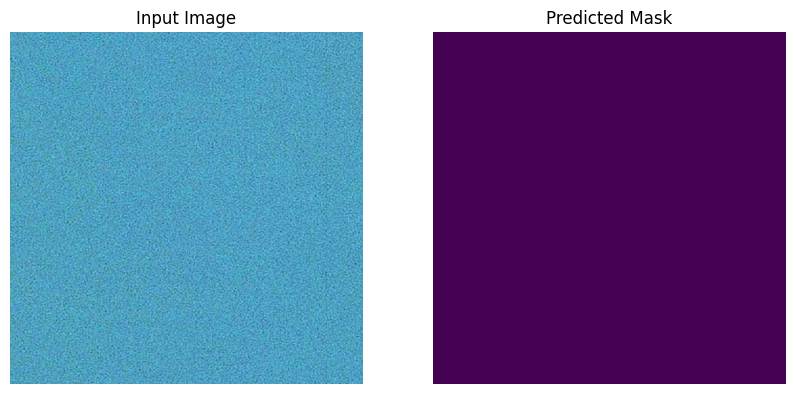

In [7]:
test_preds = predict_on_samples(test_dataset, full_image=True, num=1)

for pred in test_preds:
    display(pred)

# History

not actual history, it's from file for 5 epochs only:(

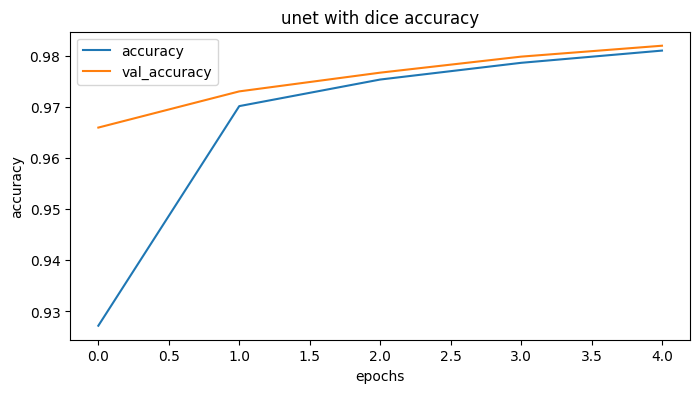

In [9]:
plt.figure(figsize=(8, 4))

plt.plot(history["accuracy"], label='accuracy')
plt.plot(history["val_accuracy"], label='val_accuracy')
plt.title('unet with dice accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [10]:
history['val_loss']

[0.25664839148521423,
 0.20042210817337036,
 0.17577418684959412,
 0.15369153022766113,
 0.13500642776489258]

In [11]:
history['loss']

[0.3454444408416748,
 0.22849732637405396,
 0.18972037732601166,
 0.16482584178447723,
 0.14668786525726318]

# Get true accuracy

### this one takes about 10-12 min

In [12]:
# accuracy = 0
# n = 1

# for x,y in tqdm(valid_dataset, total=5932):
#     x = x[np.newaxis, ...]
#     pred = unet.predict(x, verbose=0).astype(np.float32)
#     y = tf.cast(y, tf.dtypes.float32)
#     accuracy += -float(dice_loss(y, pred))+1
#     n += 1
    
# accuracy = accuracy / n
# accuracy

In [13]:
# doing the same(without progressbar)
# acc = get_true_accuracy(valid_dataset)
# acc

# Encode for submission

In [14]:
img_folder = 'train_v2'
mask_folder = 'train_masks'
test_folder = 'test_v2'

In [15]:
x_test = []
for f in os.listdir(test_folder):
    path = os.path.join(test_folder, f)
    x_test.append(path)

In [16]:
len(x_test), x_test[0]

(15606, 'test_v2\\00002bd58.jpg')

In [17]:
encoded_list = []

In [18]:
test_dataset = tf.data.Dataset.from_tensor_slices(x_test)
test_dataset = test_dataset.map(preprocess_testdata)

In [19]:
###### !Time consuming operation! takes hours

# for test_img in tqdm(test_dataset, total=len(x_test)):
#     pred = predict_full_images(test_img, unet)
#     encoded_list.append(encode_for_submission(pred))

In [20]:
# df = pd.DataFrame({'ImageId':x_test, 'EncodedPixels':encoded_list})
# df['ImageId'] = df['ImageId'].apply(lambda x: x.split('\\')[-1])

In [21]:
# df.shape

In [22]:
# df.to_csv('submission.csv', index=False)

# Predict on train dataset

In [23]:
num_batches = 1
batch_size = 3

dataset = train_dataset.batch(batch_size)
dataset = np.concatenate([x for x, y in dataset][:num_batches], axis=0)
preds = unet.predict(dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


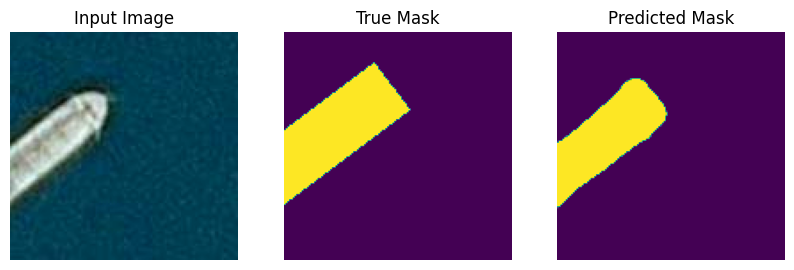

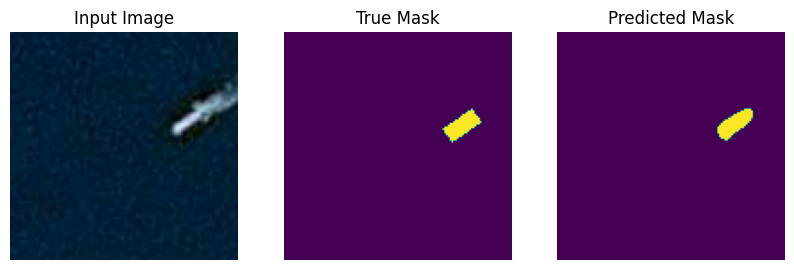

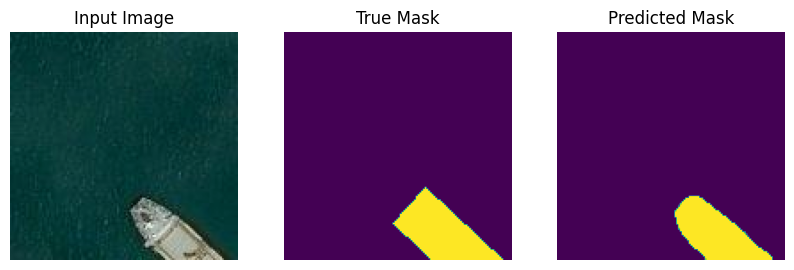

In [24]:
for (img, mask), pred in zip(train_dataset, preds):
        display([img, mask, pred])

---
### another visualization on full size image

In [25]:
x = []
y = []

for f in os.listdir(mask_folder):
    x.append(os.path.join(img_folder, f.replace('.png', '.jpg')))
    y.append(os.path.join(mask_folder, f))

In [26]:
len(x), x[0]

(42556, 'train_v2\\000155de5.jpg')

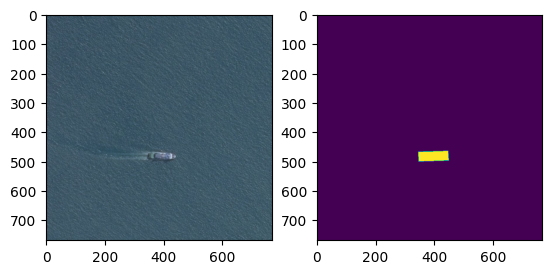

In [27]:
N = 0

sample = imageio.imread(x[N])
plt.subplot(1, 2, 1)
plt.imshow(sample)
plt.subplot(1, 2, 2)
sample_mask = imageio.imread(y[N])
plt.imshow(sample_mask)